## Exploratory Data Analysis P.1

#### Setting up imports for Pandas, Matplotlib and MySQL Connector

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection

#### Establishing connection to MySQL database
- With the following information: 
    - host = daflexsalesdb.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com
    - database = salesdb 
    - user = root
    - password = D3v$tudent
    - use_pure = True

In [2]:
mydb = connection.connect(
    host = 'daflexsalesdb.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com',
    database = 'salesdb',
    user = 'root',
    password = 'D3v$tudent',
    use_pure = True
)

#### Database Manipulation
- Query database to JOIN the information from the sales and cities tables together, and save the result as a single DataFrame variable, then view a portion of it

In [3]:
# sqlquery = """
# SELECT * FROM salesdb.sales
# JOIN salesdb.cities ON salesdb.sales.City_ID = salesdb.cities.City_ID;
# """
sqlquery = """
SELECT Invoice_ID, Customer_Type, Gender, Product_Line, Unit_price, Quantity, Sales_Tax, Total, Date, Time, Payment, COGS, Gross_Income, Rating, salesdb.sales.City_ID, City FROM salesdb.sales
JOIN salesdb.cities ON salesdb.sales.City_ID = salesdb.cities.City_ID;
"""
df = pd.read_sql_query(sqlquery, mydb)
df.head()

c:\Users\remol\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,Rating,City_ID,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,1,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,3,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,3,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,3,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,1,Seattle


#### Data Cleaning and Wrangling
- Necessary data cleaning and wrangling steps for my DataFrame includes:
    - Exploring the information of the joined DataFrame
    - Checking for and removing null values, if necessary
    - Checking for and removing duplicate rows, if necessary
    - Converting any necessary columns to Pandas DateTime format

In [4]:
df.info() # 1000 entries, Sales_Tax column all null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     1000 non-null   object 
 1   Customer_Type  1000 non-null   object 
 2   Gender         1000 non-null   object 
 3   Product_Line   1000 non-null   object 
 4   Unit_price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Sales_Tax      0 non-null      object 
 7   Total          1000 non-null   float64
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  COGS           1000 non-null   float64
 12  Gross_Income   1000 non-null   float64
 13  Rating         1000 non-null   float64
 14  City_ID        1000 non-null   int64  
 15  City           1000 non-null   object 
dtypes: float64(5), int64(2), object(9)
memory usage: 125.1+ KB


- Checking and removing null values

In [5]:
nonnull_df = df.drop(
    labels='Sales_Tax',
    axis= 1
)
nonnull_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     1000 non-null   object 
 1   Customer_Type  1000 non-null   object 
 2   Gender         1000 non-null   object 
 3   Product_Line   1000 non-null   object 
 4   Unit_price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Total          1000 non-null   float64
 7   Date           1000 non-null   object 
 8   Time           1000 non-null   object 
 9   Payment        1000 non-null   object 
 10  COGS           1000 non-null   float64
 11  Gross_Income   1000 non-null   float64
 12  Rating         1000 non-null   float64
 13  City_ID        1000 non-null   int64  
 14  City           1000 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 117.3+ KB


- Checking and removing duplicate rows

In [6]:
nonnull_df.duplicated().sort_values(ascending= False)
# no duplicate rows

0      False
671    False
658    False
659    False
660    False
       ...  
338    False
339    False
340    False
341    False
999    False
Length: 1000, dtype: bool

- Checking and removing outliers

In [7]:
total_cost_sorted_df1 = nonnull_df.sort_values('Total', ascending= True)
total_cost_sorted_df2 = nonnull_df.sort_values('Total', ascending= False)
# doesn't look like there are any outliers

- Merging 'Date and 'Time' columns
- Convert 'Date_Time' columns to utilize Pandas' DateTime datatype

In [8]:
merged_df = nonnull_df
merged_df['Date_Time'] = merged_df['Date'] + ' ' + merged_df['Time']
datetime_df = merged_df
datetime_df['Date_Time'] = pd.to_datetime(datetime_df['Date_Time'])
datetime_df.info()
mydf = datetime_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     1000 non-null   object        
 1   Customer_Type  1000 non-null   object        
 2   Gender         1000 non-null   object        
 3   Product_Line   1000 non-null   object        
 4   Unit_price     1000 non-null   float64       
 5   Quantity       1000 non-null   int64         
 6   Total          1000 non-null   float64       
 7   Date           1000 non-null   object        
 8   Time           1000 non-null   object        
 9   Payment        1000 non-null   object        
 10  COGS           1000 non-null   float64       
 11  Gross_Income   1000 non-null   float64       
 12  Rating         1000 non-null   float64       
 13  City_ID        1000 non-null   int64         
 14  City           1000 non-null   object        
 15  Date_Time      1000 no

#### Exploring the DataFrame 
- I will examine the spread of values across categories.
- I will utilize this exploration to answer the following questions:
    - How many sales were made for members vs. normal customers?
    - How many sales were made at each store location?
    - How many sales were made for each product line?
    - What is the overall average rating, based on all sales records?

In [9]:
mydf
mydf_sum = mydf['Gross_Income'].sum()
print(f'my df total sum is {mydf_sum}')

mydf_test_milwaukee = mydf.loc[(mydf['City'] == 'Milwaukee')]
mydf_test_milwaukee_sum = mydf_test_milwaukee['Gross_Income'].sum()
milwaukee_percentage = mydf_test_milwaukee_sum / mydf_sum * 100
milwaukee_percentage

my df total sum is 15379.368999999999


34.23532200833467

In [10]:
mydf_test_newyork = mydf.loc[(mydf['City'] == 'New York City')]
mydf_test_newyork_sum = mydf_test_newyork['Gross_Income'].sum()
newyork_percentage = mydf_test_newyork_sum / mydf_sum * 100
newyork_percentage

32.881921228367695

In [11]:
mydf_test_seattle = mydf.loc[(mydf['City'] == 'Seattle')]
mydf_test_seattle_sum = mydf_test_seattle['Gross_Income'].sum()
seattle_percentage = mydf_test_seattle_sum / mydf_sum * 100
seattle_percentage

32.882756763297635

In [12]:
allcitiessum = milwaukee_percentage + newyork_percentage + seattle_percentage
allcitiessum

100.0

##### How many sales were made for Members vs Normal customers?

- From looking at the following DataFrame query and graph, we can see that there were 501 Member sales and 499 Normal (Non-Member) sales within our dataset.

In [13]:
member_vs_nonmember = mydf['Customer_Type'].value_counts()
member_vs_nonmember

Member    501
Normal    499
Name: Customer_Type, dtype: int64

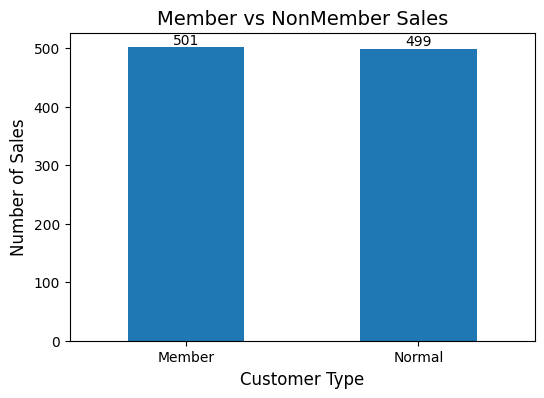

In [14]:
member_vs_nonmember = mydf['Customer_Type'].value_counts(ascending= False).plot.bar(figsize=(6,4));
plt.title('Member vs NonMember Sales', fontsize= 14);
plt.xlabel('Customer Type', fontsize= 12);
plt.xticks(rotation= 0, horizontalalignment= 'center');
plt.ylabel('Number of Sales', fontsize= 12);
member_vs_nonmember.bar_label(member_vs_nonmember.containers[0]);

##### How many sales were made at each store location?
- Our data indicates there were:
    - 328 sales in Milwaukee,
    - 332 sales in New York City,
    - 340 sales in Seattle

In [15]:
store_location_sales = mydf['City'].value_counts(ascending= True)
store_location_sales

Milwaukee        328
New York City    332
Seattle          340
Name: City, dtype: int64

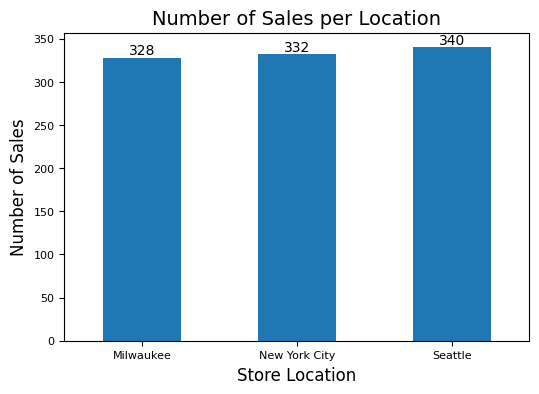

In [16]:
store_location_sales = mydf['City'].value_counts(ascending= True).plot.bar(figsize=(6,4));
plt.title('Number of Sales per Location', fontsize= 14);
plt.xlabel('Store Location', fontsize= 12);
plt.xticks(rotation= 0, horizontalalignment= 'center', fontsize= 8);
plt.ylabel('Number of Sales', fontsize= 12);
plt.yticks(fontsize= 8)
store_location_sales.bar_label(store_location_sales.containers[0]);

##### How many sales were made for each product line?
- Our data indicates that we had the following sales per product:
    - 152 health and beauty sales
    - 160 home and lifestyle sales
    - 166 sports and travel sales
    - 170 electronic accessories sales
    - 174 food and beverage sales
    - 178 fashion accessories

In [17]:
product_line_sales = mydf['Product_Line'].value_counts(ascending= True)
product_line_sales

Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Electronic accessories    170
Food and beverages        174
Fashion accessories       178
Name: Product_Line, dtype: int64

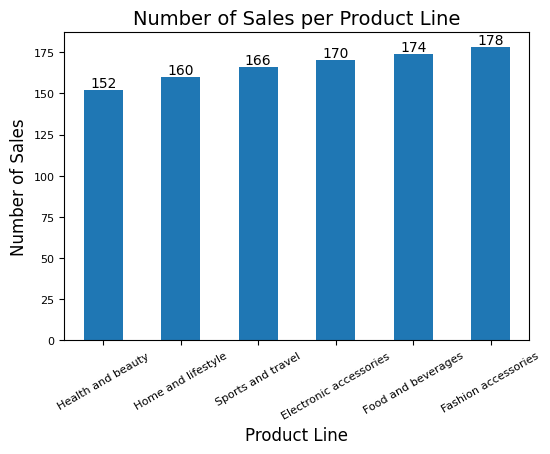

In [18]:
product_line_sales = mydf['Product_Line'].value_counts(ascending= True).plot.bar(figsize=(6,4));
plt.title('Number of Sales per Product Line', fontsize= 14);
plt.xlabel('Product Line', fontsize= 12);
plt.xticks(rotation= 30, horizontalalignment= 'center', fontsize= 8);
plt.ylabel('Number of Sales', fontsize= 12);
plt.yticks(fontsize= 8)
product_line_sales.bar_label(product_line_sales.containers[0]);

##### What is the overall average rating, based on all sales records?
- Our data indicates that the average rating based on all sales records is 6.9727.

In [19]:
mydf_average = mydf['Rating'].mean()
print(f'The average ratings based on all sales records is {mydf_average}.')

The average ratings based on all sales records is 6.9727.


##### Average Rating per Location?
- Our data indicates the average store rating is as follows: 
    - Milwaukee = 7.073
    - New York City = 6.818
    - Seattle = 7.027

In [20]:
# Milwaukee
mydf_milwaukee = mydf.loc[(mydf['City'] == 'Milwaukee')]
mydf_milwaukee_average_rating = mydf_milwaukee['Rating'].mean()
print(f'The average rating for the Milwaukee store location based on all sales records is {mydf_milwaukee_average_rating}.')

# NYC
mydf_new_york_city = mydf.loc[(mydf['City'] == 'New York City')]
mydf_new_york_city_average_rating = mydf_new_york_city['Rating'].mean()
print(f'The average rating for the New York City store location based on all sales records is {mydf_new_york_city_average_rating}.')

# Seattle
mydf_seattle = mydf.loc[(mydf['City'] == 'Seattle')]
mydf_seattle_average_rating = mydf_seattle['Rating'].mean()
print(f'The average rating for the Seattle store location based on all sales records is {mydf_seattle_average_rating}.')


The average rating for the Milwaukee store location based on all sales records is 7.072865853658537.
The average rating for the New York City store location based on all sales records is 6.818072289156627.
The average rating for the Seattle store location based on all sales records is 7.027058823529411.


## Exploratory Data Analysis P.2

#### Setting up import for SCIKIT-Learn

In [21]:
from sklearn.linear_model import LinearRegression

#### Numerical Trends

- Describing numeric trends in my DataFrame, using the appropriate Pandas function

In [22]:
mydf.describe()

,Unit_price,Quantity,Total,COGS,Gross_Income,Rating,City_ID
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270,1.988000
std,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858,0.817633
min,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000,1.000000
25%,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000,1.000000
50%,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000,2.000000
75%,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000,3.000000
max,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000,3.000000


#### Column Correlation
- Exploring the correlation between columns of my data set, using the appropriate Pandas function
- Knowing that the closer a value is to -1 or 1, the stronger the correlation is between two columns within our DataFrame
    - Knowing this, we observe the strongest correlation between:
        - Quantity and Total or COGS or Gross_Income
            - corr: 0.705510

In [23]:
mydf.corr()

,Unit_price,Quantity,Total,COGS,Gross_Income,Rating,City_ID
Unit_price,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778,0.028202
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815,0.015964
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,0.041047
COGS,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,0.041047
Gross_Income,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442,0.041047
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000,0.010238
City_ID,0.028202,0.015964,0.041047,0.041047,0.041047,0.010238,1.000000


#### High Correlation Plotting
- With the columns with the strongest correlation noted, and I will visualize those two columns using a Matplotlib Scatter Plot. I will ensure my plot includes the following:
    - A chart title
    - An X-axis label
    - A Y-axis label

c:\Users\remol\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'Gross Income')

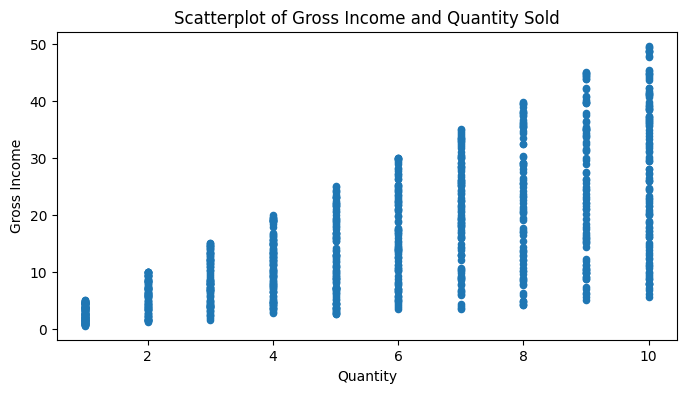

In [24]:
mydf.plot.scatter(x='Quantity', y='Gross_Income', figsize=(8,4))
plt.title('Scatterplot of Gross Income and Quantity Sold')
plt.ylabel('Gross Income')

#### Reshaping Columns for Linear Regression Fit
- Reshaping my two columns to prepare for fitting to a linear regression model, and save each as its own unique variable.

In [25]:
model = LinearRegression()

x_values = mydf[['Quantity']]
y_values = mydf[['Gross_Income']]

#### Plotting Linear Regression Model
- Creating a new LinearRegression instance, and using the appropriate function to create a predictive model for my Y-axis values.

In [26]:
model.fit(x_values, y_values)
y_prediction_line = model.predict(x_values)

#### Creating a Visualization of Predictive Model
- Creating a visualization of my predictive model, and ensuring I include the following stylizations:
    - A chart title
    - X-axis label
    - Y-axis label
    - A different color line for my predictive model

c:\Users\remol\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'Gross Income')

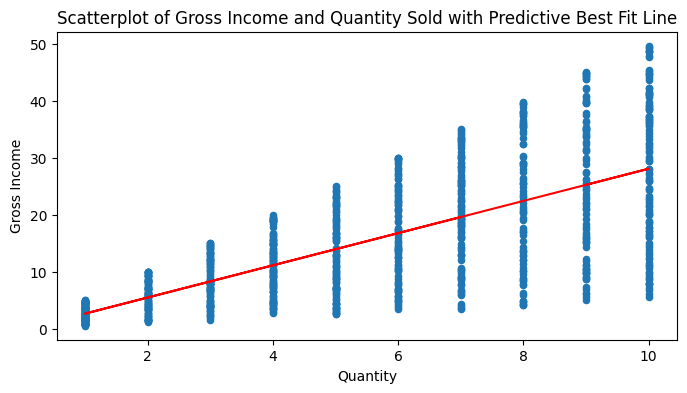

In [27]:
mydf.plot.scatter(x='Quantity', y='Gross_Income', figsize=(8,4))
plt.plot(x_values, y_prediction_line, color='red')
plt.title('Scatterplot of Gross Income and Quantity Sold with Predictive Best Fit Line')
plt.ylabel('Gross Income')

#### Generating Linear Regression Formula
- Known as y = mx + b
- First I will generate the y-intercept (b)
- Second, the slope of the line (m)
- Lastly, I will present the generated Linear Regression Formula

In [28]:
y_intercept = model.intercept_
print(f'The y-intercept for our line is: {y_intercept[0]}.')

slope = model.coef_
print(f'The slope of our line is {slope[0][0]}.')

print(f'Our best fit line is Gross Income = {slope[0][0]} * Quantity + {y_intercept[0]}.')

quantity = 15
gross_income = slope*quantity+y_intercept
print(f"If we sell a quantity of {quantity} items, our model predicts our gross income will be {gross_income[0][0]}")

The y-intercept for our line is: -0.1901584790171018.
The slope of our line is 2.8256855678796917.
Our best fit line is Gross Income = 2.8256855678796917 * Quantity + -0.1901584790171018.
If we sell a quantity of 15 items, our model predicts our gross income will be 42.19512503917828


#### Presentation of Findings
- Presenting my findings as a Level I-style video recording (informal) that is no more than 5-8 minutes and covers the following:
    - The completed results of my Jupyter notebook
    - Key visualizations generated based off of evaluation questions
    - Any other cleaned/wrangled supporting data 
    - Communicate any insights you’ve gathered by working with the data
    - Make sure to address a specific individual in my video as if I were responding to a request for analysis (can pick a fictional person or choose an instructor!)